# Regresja liniowa

## Analityczna i numeryczna implementacja regresji liniowej

Importowanie bibliotek

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
import scipy
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
import time
sns.set()

Generowanie zbioru danych

In [2]:
x, y = make_regression(n_samples=2548, n_features=1, noise=16, random_state=254448)

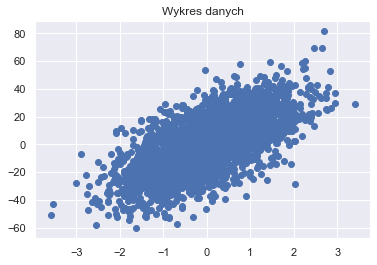

In [3]:
plt.scatter(x, y)
plt.title('Wykres danych')
plt.show()


In [4]:
class regresja():
    
    def analityczna(self, x, y):
        #dodanie wektora 1, aby można było wyliczyć b
        x = np.concatenate([np.ones((len(x), 1)), x], axis=1)
        xt = x.T
        xtx = np.matmul(xt, x)
        xty = np.matmul(xt, y)
        w = np.matmul(np.linalg.inv(xtx),xty)
        #pierwsza współrzędna b
        self.w = np.reshape(w, (-1,1))
        return np.reshape(w, (-1,1))
    
    def least_squares(self, w, x, y):
        w_new = np.reshape(w, (-1,1))
        y_new = np.reshape(y, (-1,1))
        y_new = y[:,np.newaxis]
        xtw = np.matmul(x, w_new)
        return 1/len(x)*np.matmul((y_new-xtw).T, (y_new-xtw))
    
    def numeryczna(self, x, y):
        x = np.concatenate([np.ones((len(x), 1)), x], axis=1)
        t = scipy.optimize.minimize(self.least_squares, x0 = [1,2], method='Powell', args=(x, y))
        self.w = t.x.reshape(-1,1)
        return t.x.reshape(-1,1)
    
    def analityczna_Tichonowa(self, x, y, lbd=1):
        x = np.concatenate([np.ones((len(x), 1)), x], axis=1)
        xt = x.T
        xtx = np.matmul(xt, x)
        xty = np.matmul(xt, y)
        w = np.matmul(np.linalg.inv(xtx+lbd*np.eye(len(xtx))),xty)
        #pierwsza współrzędna b
        self.w = np.reshape(w, (-1,1))
        return np.reshape(w, (-1,1))
        
    

Regresja numeryczna dla zbioru danych

In [5]:
regresja1 = regresja()

d = regresja1.numeryczna(x, y)

x_0 = np.concatenate([np.ones((len(x), 1)), x], axis=1)
print('średni błąd kwadratowy:', regresja1.least_squares(regresja1.w, x_0, y))
print('współczynniki regresji:', d)

średni błąd kwadratowy: [[243.30912194]]
współczynniki regresji: [[ 0.33306017]
 [12.9337237 ]]


Regresja analityczna dla zbioru danych

In [6]:
regresja2 = regresja()

coef = regresja2.analityczna(x, y)
print('średni błąd kwadratowy:', regresja2.least_squares(regresja2.w, x_0, y))
print('współczynniki regresji:', coef)

średni błąd kwadratowy: [[243.30912194]]
współczynniki regresji: [[ 0.33306017]
 [12.93372368]]


Współczynniki podane przez analityczną oraz numeryczną wersję regresji liniowej różnią się nieznacznie, jednak ich błędy średniokwadratowe są sobie równe.

In [7]:
start1 = time.time()
regresja_time = regresja()
for i in range(1001):
    regresja_time.analityczna(x,y)
end1 = time.time()
print('czas wykonania dla analitycznej:', end1-start1)

czas wykonania dla analitycznej: 0.09398412704467773


In [8]:
start2 = time.time()
regresja_time2 = regresja()
for i in range(1001):
    regresja_time2.numeryczna(x,y)
end2 = time.time()
print('czas wykonania dla numerycznej:', end2-start2)

czas wykonania dla numerycznej: 2.752307653427124


Wersja numeryczna zajmuje więcej czasu.

## Zbiór flappy bird

### Wczytanie zbiorów

In [ ]:
zbior1 = pd.read_excel(r"zbior1.xlsx", header=None, names=['x', 'y'])
zbior2 = pd.read_excel(r"zbior2.xlsx", header=None, names=['x', 'y'])
zbior3 = pd.read_excel(r"zbior3.xlsx", header=None, names=['x', 'y'])

Skalowanie wartości x i y do przedziału [0,1]

In [10]:
minmax = MinMaxScaler()
zbior1['x'] = minmax.fit_transform(zbior1['x'].values.reshape(-1,1))
zbior1['y'] = minmax.fit_transform(zbior1['y'].values.reshape(-1,1))
zbior2['x'] = minmax.fit_transform(zbior2['x'].values.reshape(-1,1))
zbior2['y'] = minmax.fit_transform(zbior2['y'].values.reshape(-1,1))
zbior3['x'] = minmax.fit_transform(zbior3['x'].values.reshape(-1,1))
zbior3['y'] = minmax.fit_transform(zbior3['y'].values.reshape(-1,1))

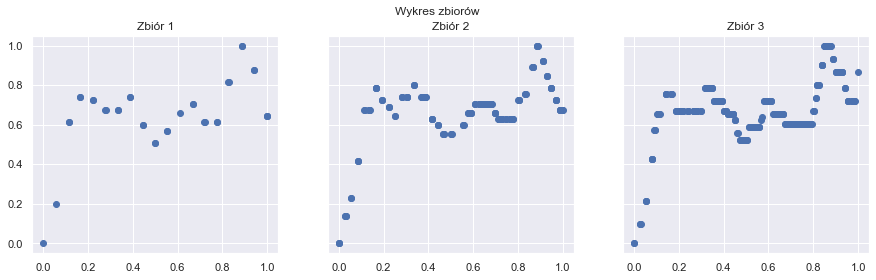

In [11]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(15,4))

fig.suptitle('Wykres zbiorów')
axes[0].scatter(zbior1['x'], zbior1['y'])
axes[0].set_title('Zbiór 1')
axes[1].scatter(zbior2['x'], zbior2['y'])
axes[1].set_title('Zbiór 2')
axes[2].scatter(zbior3['x'], zbior3['y'])
axes[2].set_title('Zbiór 3')
plt.show()

### Regresja 9 rzędu dla pierwszego zbioru 

In [12]:
poly9 = PolynomialFeatures(9, include_bias=False) #bias będzie dodany podczas regresji
zbior1_poly9 = poly9.fit_transform(zbior1['x'].values.reshape(-1,1))

Regresja dla implementacji z sklearn

In [13]:
regresja1_poly9 = LinearRegression()
regresja1_poly9.fit(zbior1_poly9, zbior1['y'])
zbior1_predict9 = regresja1_poly9.predict(zbior1_poly9)

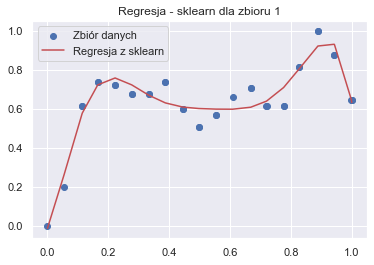

In [14]:
plt.scatter(zbior1['x'], zbior1['y'], color='b', label='Zbiór danych')
plt.plot(zbior1['x'], zbior1_predict9, color='r', label='Regresja z sklearn')
plt.title('Regresja - sklearn dla zbioru 1')
plt.legend()
plt.show()

Regresja dla własnej implementacji

In [15]:
regresja1_poly9_a = regresja()
regresja1_poly9_a.analityczna(zbior1_poly9, zbior1['y'])

array([[-1.40576586e-02],
       [ 2.62651263e+00],
       [ 7.61016407e+01],
       [-7.24813001e+02],
       [ 2.80504626e+03],
       [-5.93576459e+03],
       [ 7.43154910e+03],
       [-5.53210718e+03],
       [ 2.29824292e+03],
       [-4.20235363e+02]])

In [16]:
zbior1_poly9_bias = np.concatenate([np.ones((len(zbior1_poly9), 1)), zbior1_poly9], axis=1)
zbior1_predict9_a = np.matmul(zbior1_poly9_bias, regresja1_poly9_a.w)

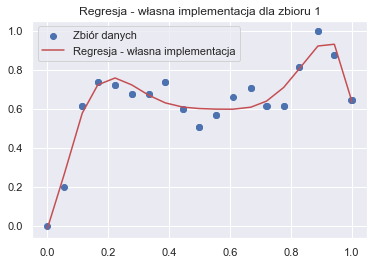

In [17]:
plt.scatter(zbior1['x'], zbior1['y'], color='b', label='Zbiór danych')
plt.plot(zbior1['x'], zbior1_predict9_a, color='r', label='Regresja - własna implementacja')
plt.title('Regresja - własna implementacja dla zbioru 1')
plt.legend()
plt.show()

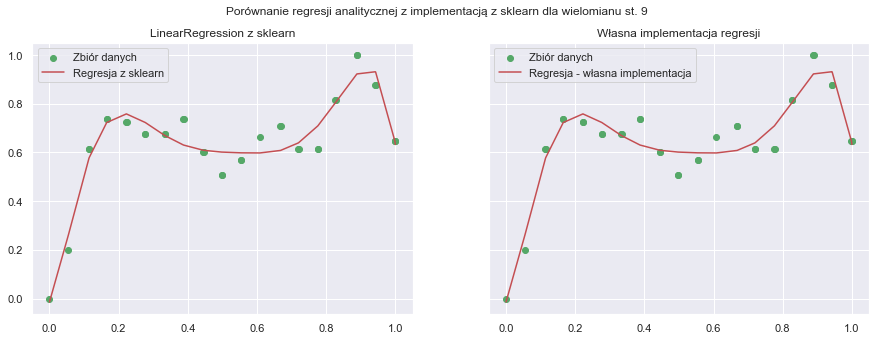

In [18]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,5))

fig.suptitle('Porównanie regresji analitycznej z implementacją z sklearn dla wielomianu st. 9')
axes[0].scatter(zbior1['x'], zbior1['y'], color='g', label='Zbiór danych')
axes[0].plot(zbior1['x'], zbior1_predict9, color='r', label='Regresja z sklearn')
axes[0].legend()
axes[0].set_title('LinearRegression z sklearn')
axes[1].scatter(zbior1['x'], zbior1['y'], color='g', label='Zbiór danych')
axes[1].plot(zbior1['x'], zbior1_predict9_a, color='r', label='Regresja - własna implementacja')
axes[1].legend()
axes[1].set_title('Własna implementacja regresji')
plt.legend()
plt.show()

In [19]:
mse_9_a = regresja1_poly9_a.least_squares(regresja1_poly9_a.w, zbior1_poly9_bias, np.array(zbior1['y']))
mse_9_sklearn = mean_squared_error(zbior1['y'], zbior1_predict9)
print('MSE dla własnej implementacji regresji liniowej dla wielomianu 9 stopnia wynosi', mse_9_a[0][0])
print('MSE dla sklearn wynosi', mse_9_sklearn)

MSE dla własnej implementacji regresji liniowej dla wielomianu 9 stopnia wynosi 0.0032796496548883154
MSE dla sklearn wynosi 0.0032796459649590253


Obie implementacje poradziły sobie równie dobrze przy dopasowaniu się do zbioru.

### Regresja 21 rzędu dla pierwszego zbioru

In [20]:
poly21 = PolynomialFeatures(21, include_bias=False) #bias będzie dodany podczas regresji
zbior1_poly21 = poly21.fit_transform(zbior1['x'].values.reshape(-1,1))

In [21]:
regresja1_poly21 = LinearRegression()
regresja1_poly21.fit(zbior1_poly21, zbior1['y'])
zbior1_predict21 = regresja1_poly21.predict(zbior1_poly21)

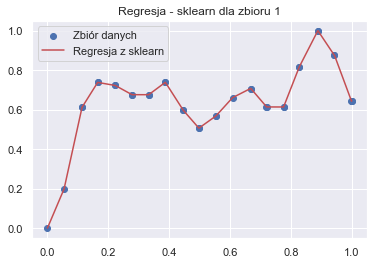

In [22]:
plt.scatter(zbior1['x'], zbior1['y'], color='b', label='Zbiór danych')
plt.plot(zbior1['x'], zbior1_predict21, color='r', label='Regresja z sklearn')
plt.title('Regresja - sklearn dla zbioru 1')
plt.legend()
plt.show()

In [23]:
regresja1_poly21_a = regresja()
regresja1_poly21_a.analityczna(zbior1_poly21, zbior1['y'])

array([[ 1.00393653e+00],
       [-3.32349472e+01],
       [ 2.56249023e+02],
       [-1.78288281e+03],
       [ 9.46168750e+03],
       [-3.89707500e+04],
       [ 1.39715000e+05],
       [-3.70388000e+05],
       [ 6.04451500e+05],
       [-5.65862000e+05],
       [ 3.53246250e+05],
       [-1.08969000e+05],
       [-4.58190000e+05],
       [ 6.82034000e+05],
       [ 3.40080000e+04],
       [ 7.88100000e+04],
       [-1.14136900e+06],
       [ 7.87075000e+05],
       [ 7.09454062e+04],
       [ 3.16271750e+05],
       [-6.13605000e+05],
       [ 2.22890000e+05]])

In [24]:
zbior1_poly21_bias = np.concatenate([np.ones((len(zbior1_poly21), 1)), zbior1_poly21], axis=1)
zbior1_predict21_a = np.matmul(zbior1_poly21_bias, regresja1_poly21_a.w)

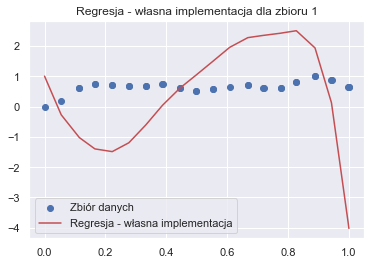

In [25]:
plt.scatter(zbior1['x'], zbior1['y'], color='b', label='Zbiór danych')
plt.plot(zbior1['x'], zbior1_predict21_a, color='r', label='Regresja - własna implementacja')
plt.title('Regresja - własna implementacja dla zbioru 1')
plt.legend()
plt.show()

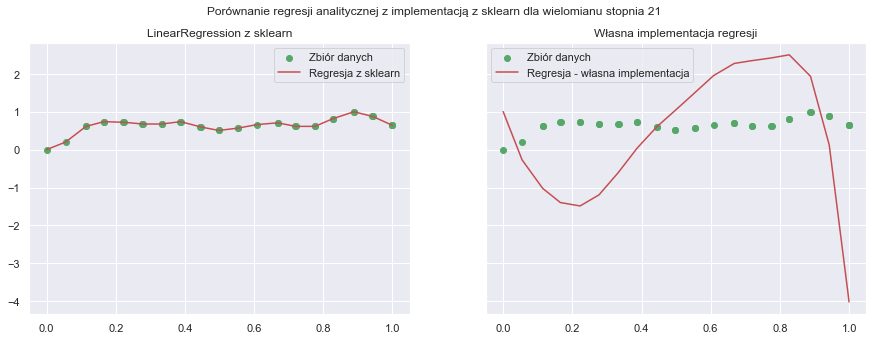

In [26]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,5))

fig.suptitle('Porównanie regresji analitycznej z implementacją z sklearn dla wielomianu stopnia 21')
axes[0].scatter(zbior1['x'], zbior1['y'], color='g', label='Zbiór danych')
axes[0].plot(zbior1['x'], zbior1_predict21, color='r', label='Regresja z sklearn')
axes[0].legend()
axes[0].set_title('LinearRegression z sklearn')
axes[1].scatter(zbior1['x'], zbior1['y'], color='g', label='Zbiór danych')
axes[1].plot(zbior1['x'], zbior1_predict21_a, color='r', label='Regresja - własna implementacja')
axes[1].legend()
axes[1].set_title('Własna implementacja regresji')
plt.legend()
plt.show()

In [27]:
mse_21_a = regresja1_poly21_a.least_squares(regresja1_poly21_a.w, zbior1_poly21_bias, np.array(zbior1['y']))
mse_21_sklearn = mean_squared_error(zbior1['y'], zbior1_predict21)
print('MSE dla własnej implementacji regresji liniowej dla wielomianu 21 stopnia wynosi', mse_21_a[0][0])
print('MSE dla sklearn wynosi', mse_21_sklearn)

MSE dla własnej implementacji regresji liniowej dla wielomianu 21 stopnia wynosi 3.620271165996556
MSE dla sklearn wynosi 6.244803490839467e-07


W tym przypadku znacznie lepiej dopasowała się regresja liniowa z pakietu sklearn.

### Regresja 9 rzędu dla drugiego zbioru

In [28]:
zbior2_poly9 = poly9.fit_transform(zbior2['x'].values.reshape(-1,1))
regresja2_poly9 = LinearRegression()
regresja2_poly9.fit(zbior2_poly9, zbior2['y'])
zbior2_predict9 = regresja2_poly9.predict(zbior2_poly9)

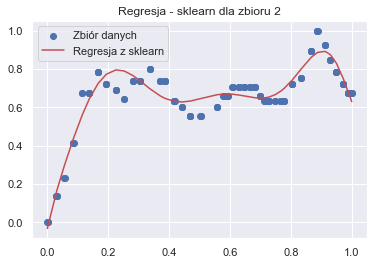

In [29]:
plt.scatter(zbior2['x'], zbior2['y'], color='b', label='Zbiór danych')
plt.plot(zbior2['x'], zbior2_predict9, color='r', label='Regresja z sklearn')
plt.title('Regresja - sklearn dla zbioru 2')
plt.legend()
plt.show()

In [30]:
regresja2_poly9_a = regresja()
regresja2_poly9_a.analityczna(zbior2_poly9, zbior2['y'])
zbior2_poly9_bias = np.concatenate([np.ones((len(zbior2_poly9), 1)), zbior2_poly9], axis=1)
zbior2_predict9_a = np.matmul(zbior2_poly9_bias, regresja2_poly9_a.w)

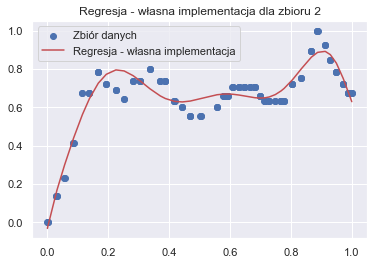

In [31]:
plt.scatter(zbior2['x'], zbior2['y'], color='b', label='Zbiór danych')
plt.plot(zbior2['x'], zbior2_predict9_a, color='r', label='Regresja - własna implementacja')
plt.title('Regresja - własna implementacja dla zbioru 2')
plt.legend()
plt.show()

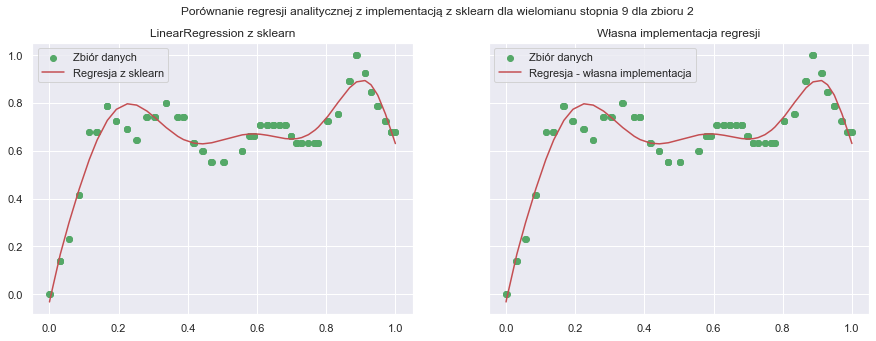

In [32]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,5))

fig.suptitle('Porównanie regresji analitycznej z implementacją z sklearn dla wielomianu stopnia 9 dla zbioru 2')
axes[0].scatter(zbior2['x'], zbior2['y'], color='g', label='Zbiór danych')
axes[0].plot(zbior2['x'], zbior2_predict9, color='r', label='Regresja z sklearn')
axes[0].legend()
axes[0].set_title('LinearRegression z sklearn')
axes[1].scatter(zbior2['x'], zbior2['y'], color='g', label='Zbiór danych')
axes[1].plot(zbior2['x'], zbior2_predict9_a, color='r', label='Regresja - własna implementacja')
axes[1].legend()
axes[1].set_title('Własna implementacja regresji')
plt.legend()
plt.show()

In [33]:
mse_9_a_2 = regresja2_poly9_a.least_squares(regresja2_poly9_a.w, zbior2_poly9_bias, np.array(zbior2['y']))
mse_9_sklearn_2 = mean_squared_error(zbior2['y'], zbior2_predict9)
print('MSE dla własnej implementacji regresji liniowej dla wielomianu 9 stopnia wynosi', mse_9_a_2[0][0])
print('MSE dla sklearn wynosi', mse_9_sklearn_2)

MSE dla własnej implementacji regresji liniowej dla wielomianu 9 stopnia wynosi 0.0031482835305467883
MSE dla sklearn wynosi 0.0031482808922649198


Dla wielomianu stopnia 9 dla zbioru 2, obie implementacje regresji poradził sobie równie dobrze.

### Regresja 21 stopnia dla drugiego zbioru

In [34]:
zbior2_poly21 = poly21.fit_transform(zbior2['x'].values.reshape(-1,1))
regresja2_poly21 = LinearRegression()
regresja2_poly21.fit(zbior2_poly21, zbior2['y'])
zbior2_predict21 = regresja2_poly21.predict(zbior2_poly21)

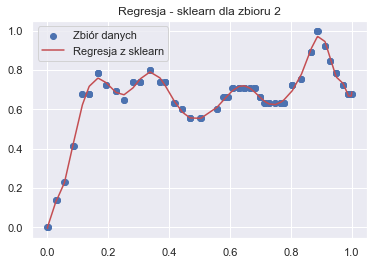

In [35]:
plt.scatter(zbior2['x'], zbior2['y'], color='b', label='Zbiór danych')
plt.plot(zbior2['x'], zbior2_predict21, color='r', label='Regresja z sklearn')
plt.title('Regresja - sklearn dla zbioru 2')
plt.legend()
plt.show()

In [36]:
regresja2_poly21_a = regresja()
regresja2_poly21_a.analityczna(zbior2_poly21, zbior2['y'])
zbior2_poly21_bias = np.concatenate([np.ones((len(zbior2_poly21), 1)), zbior2_poly21], axis=1)
zbior2_predict21_a = np.matmul(zbior2_poly21_bias, regresja2_poly21_a.w)

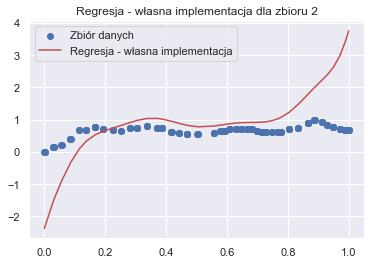

In [37]:
plt.scatter(zbior2['x'], zbior2['y'], color='b', label='Zbiór danych')
plt.plot(zbior2['x'], zbior2_predict21_a, color='r', label='Regresja - własna implementacja')
plt.title('Regresja - własna implementacja dla zbioru 2')
plt.legend()
plt.show()

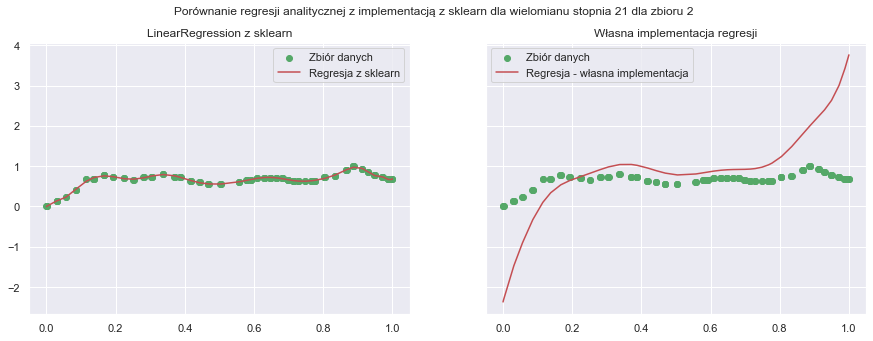

In [38]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,5))

fig.suptitle('Porównanie regresji analitycznej z implementacją z sklearn dla wielomianu stopnia 21 dla zbioru 2')
axes[0].scatter(zbior2['x'], zbior2['y'], color='g', label='Zbiór danych')
axes[0].plot(zbior2['x'], zbior2_predict21, color='r', label='Regresja z sklearn')
axes[0].legend()
axes[0].set_title('LinearRegression z sklearn')
axes[1].scatter(zbior2['x'], zbior2['y'], color='g', label='Zbiór danych')
axes[1].plot(zbior2['x'], zbior2_predict21_a, color='r', label='Regresja - własna implementacja')
axes[1].legend()
axes[1].set_title('Własna implementacja regresji')
plt.legend()
plt.show()

In [39]:
mse_21_a_2 = regresja2_poly21_a.least_squares(regresja2_poly21_a.w, zbior2_poly21_bias, np.array(zbior2['y']))
mse_21_sklearn_2 = mean_squared_error(zbior2['y'], zbior2_predict21)
print('MSE dla własnej implementacji regresji liniowej dla wielomianu 21 stopnia wynosi', mse_21_a_2[0][0])
print('MSE dla sklearn wynosi', mse_21_sklearn_2)

MSE dla własnej implementacji regresji liniowej dla wielomianu 21 stopnia wynosi 1.0507408224305714
MSE dla sklearn wynosi 0.0003029272088885753


Dla zbioru drugiego i regresji liniowej wielomianem stopnia 21, lepiej dopasowana jest regresja z pakietu sklearn

### Regresja 9 stopnia dla trzeciego zbioru

In [40]:
zbior3_poly9 = poly9.fit_transform(zbior3['x'].values.reshape(-1,1))
regresja3_poly9 = LinearRegression()
regresja3_poly9.fit(zbior3_poly9, zbior3['y'])
zbior3_predict9 = regresja3_poly9.predict(zbior3_poly9)

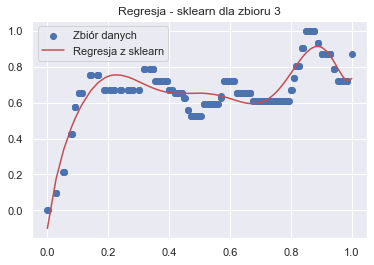

In [41]:
plt.scatter(zbior3['x'], zbior3['y'], color='b', label='Zbiór danych')
plt.plot(zbior3['x'], zbior3_predict9, color='r', label='Regresja z sklearn')
plt.title('Regresja - sklearn dla zbioru 3')
plt.legend()
plt.show()

In [42]:
regresja3_poly9_a = regresja()
regresja3_poly9_a.analityczna(zbior3_poly9, zbior3['y'])
zbior3_poly9_bias = np.concatenate([np.ones((len(zbior3_poly9), 1)), zbior3_poly9], axis=1)
zbior3_predict9_a = np.matmul(zbior3_poly9_bias, regresja3_poly9_a.w)

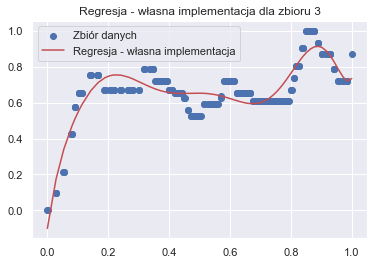

In [43]:
plt.scatter(zbior3['x'], zbior3['y'], color='b', label='Zbiór danych')
plt.plot(zbior3['x'], zbior3_predict9_a, color='r', label='Regresja - własna implementacja')
plt.title('Regresja - własna implementacja dla zbioru 3')
plt.legend()
plt.show()

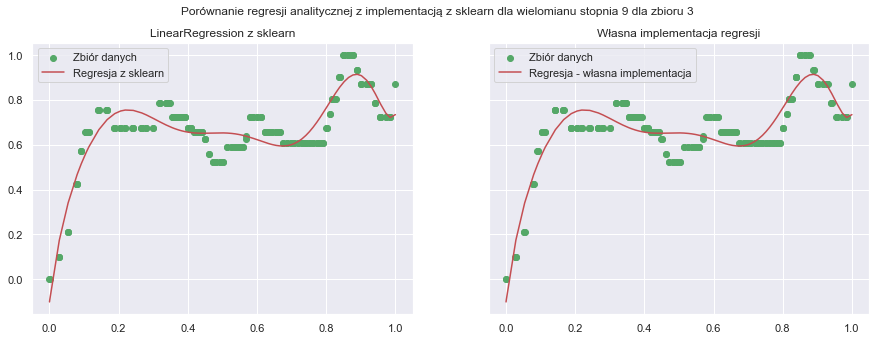

In [44]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,5))

fig.suptitle('Porównanie regresji analitycznej z implementacją z sklearn dla wielomianu stopnia 9 dla zbioru 3')
axes[0].scatter(zbior3['x'], zbior3['y'], color='g', label='Zbiór danych')
axes[0].plot(zbior3['x'], zbior3_predict9, color='r', label='Regresja z sklearn')
axes[0].legend()
axes[0].set_title('LinearRegression z sklearn')
axes[1].scatter(zbior3['x'], zbior3['y'], color='g', label='Zbiór danych')
axes[1].plot(zbior3['x'], zbior3_predict9_a, color='r', label='Regresja - własna implementacja')
axes[1].legend()
axes[1].set_title('Własna implementacja regresji')
plt.legend()
plt.show()

In [45]:
mse_9_a_3 = regresja3_poly9_a.least_squares(regresja3_poly9_a.w, zbior3_poly9_bias, np.array(zbior3['y']))
mse_9_sklearn_3 = mean_squared_error(zbior3['y'], zbior3_predict9)
print('MSE dla własnej implementacji regresji liniowej dla wielomianu 21 stopnia wynosi', mse_9_a_3[0][0])
print('MSE dla sklearn wynosi', mse_9_sklearn_3)

MSE dla własnej implementacji regresji liniowej dla wielomianu 21 stopnia wynosi 0.004837198775470992
MSE dla sklearn wynosi 0.0048371987377342366


Obie wersje regresji poradziły sobie równie dobrze dla wielomianu stopnia 9.

### Regresja 21 stopnia dla trzeciego zbioru

In [46]:
zbior3_poly21 = poly21.fit_transform(zbior3['x'].values.reshape(-1,1))
regresja3_poly21 = LinearRegression()
regresja3_poly21.fit(zbior3_poly21, zbior3['y'])
zbior3_predict21 = regresja3_poly21.predict(zbior3_poly21)

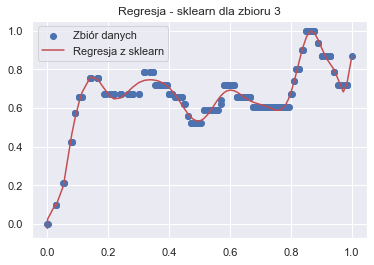

In [47]:
plt.scatter(zbior3['x'], zbior3['y'], color='b', label='Zbiór danych')
plt.plot(zbior3['x'], zbior3_predict21, color='r', label='Regresja z sklearn')
plt.title('Regresja - sklearn dla zbioru 3')
plt.legend()
plt.show()

In [48]:
regresja3_poly21_a = regresja()
regresja3_poly21_a.analityczna(zbior3_poly21, zbior3['y'])
zbior3_poly21_bias = np.concatenate([np.ones((len(zbior3_poly21), 1)), zbior3_poly21], axis=1)
zbior3_predict21_a = np.matmul(zbior3_poly21_bias, regresja3_poly21_a.w)

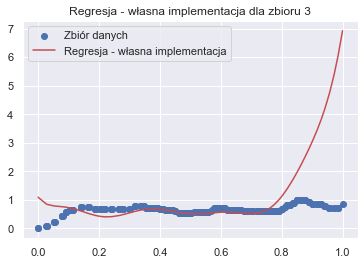

In [49]:
plt.scatter(zbior3['x'], zbior3['y'], color='b', label='Zbiór danych')
plt.plot(zbior3['x'], zbior3_predict21_a, color='r', label='Regresja - własna implementacja')
plt.title('Regresja - własna implementacja dla zbioru 3')
plt.legend()
plt.show()

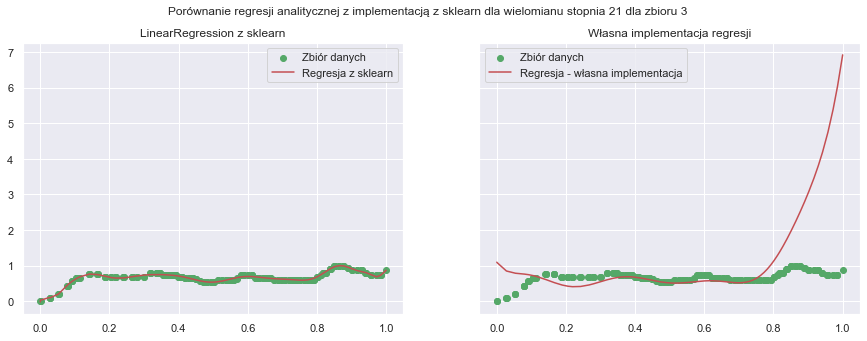

In [50]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,5))

fig.suptitle('Porównanie regresji analitycznej z implementacją z sklearn dla wielomianu stopnia 21 dla zbioru 3')
axes[0].scatter(zbior3['x'], zbior3['y'], color='g', label='Zbiór danych')
axes[0].plot(zbior3['x'], zbior3_predict21, color='r', label='Regresja z sklearn')
axes[0].legend()
axes[0].set_title('LinearRegression z sklearn')
axes[1].scatter(zbior3['x'], zbior3['y'], color='g', label='Zbiór danych')
axes[1].plot(zbior3['x'], zbior3_predict21_a, color='r', label='Regresja - własna implementacja')
axes[1].legend()
axes[1].set_title('Własna implementacja regresji')
plt.legend()
plt.show()

In [51]:
mse_21_a_3 = regresja3_poly21_a.least_squares(regresja3_poly21_a.w, zbior3_poly21_bias, np.array(zbior3['y']))
mse_21_sklearn_3 = mean_squared_error(zbior3['y'], zbior3_predict21)
print('MSE dla własnej implementacji regresji liniowej dla wielomianu 21 stopnia wynosi', mse_21_a_3[0][0])
print('MSE dla sklearn wynosi', mse_21_sklearn_3)

MSE dla własnej implementacji regresji liniowej dla wielomianu 21 stopnia wynosi 1.6694200604575036
MSE dla sklearn wynosi 0.0005888763058121503


Przy regresji liniowej wielomianem stopnia 21, lepiej zadziałała regresja z pakietu sklearn.

### Regresja liniowa z regularyzacja Tichonowa dla zbioru 1

In [52]:
poly16 = PolynomialFeatures(16, include_bias=False)
zbior1_poly16 = poly16.fit_transform(zbior1['x'].values.reshape(-1,1))
regresja1_tich = Ridge(alpha=0.1)
regresja1_tich.fit(zbior1_poly16, zbior1['y'])
zbior1_predict16 = regresja1_tich.predict(zbior1_poly16)

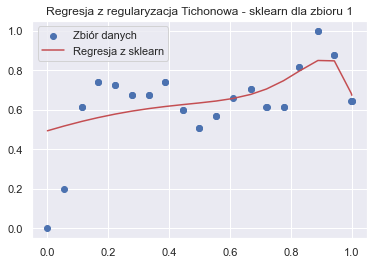

In [53]:
plt.scatter(zbior1['x'], zbior1['y'], color='b', label='Zbiór danych')
plt.plot(zbior1['x'], zbior1_predict16, color='r', label='Regresja z sklearn')
plt.title('Regresja z regularyzacja Tichonowa - sklearn dla zbioru 1')
plt.legend()
plt.show()

In [54]:
regresja1_tich_a = regresja()
regresja1_tich_a.analityczna_Tichonowa(zbior1_poly16, zbior1['y'], lbd=0.1)
zbior1_poly16_bias = np.concatenate([np.ones((len(zbior1_poly16), 1)), zbior1_poly16], axis=1)
zbior1_predict16_a = np.matmul(zbior1_poly16_bias, regresja1_tich_a.w)

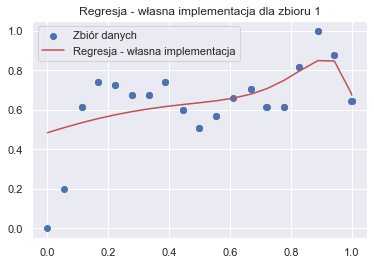

In [55]:
plt.scatter(zbior1['x'], zbior1['y'], color='b', label='Zbiór danych')
plt.plot(zbior1['x'], zbior1_predict16_a, color='r', label='Regresja - własna implementacja')
plt.title('Regresja - własna implementacja dla zbioru 1')
plt.legend()
plt.show()

In [56]:
mse_16_a_1 = regresja1_tich_a.least_squares(regresja1_tich_a.w, zbior1_poly16_bias, np.array(zbior1['y']))
mse_16_sklearn_1 = mean_squared_error(zbior1['y'], zbior1_predict16)
print('MSE dla własnej implementacji regresji liniowej dla wielomianu 16 stopnia wynosi', mse_16_a_1[0][0])
print('MSE dla sklearn wynosi', mse_16_sklearn_1)

MSE dla własnej implementacji regresji liniowej dla wielomianu 16 stopnia wynosi 0.018339595326370462
MSE dla sklearn wynosi 0.018438122672879014


### Regresja liniowa z regularyzacją Tichonowa dla zbioru 2

In [57]:
zbior2_poly16 = poly16.fit_transform(zbior2['x'].values.reshape(-1,1))
regresja2_tich = Ridge(alpha=0.1)
regresja2_tich.fit(zbior2_poly16, zbior2['y'])
zbior2_predict16 = regresja2_tich.predict(zbior2_poly16)

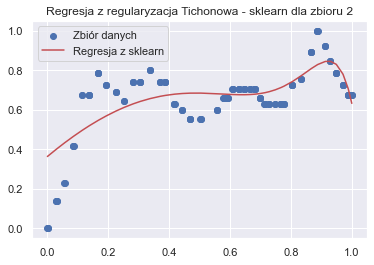

In [58]:
plt.scatter(zbior2['x'], zbior2['y'], color='b', label='Zbiór danych')
plt.plot(zbior2['x'], zbior2_predict16, color='r', label='Regresja z sklearn')
plt.title('Regresja z regularyzacja Tichonowa - sklearn dla zbioru 2')
plt.legend()
plt.show()

In [59]:
regresja2_tich_a = regresja()
regresja2_tich_a.analityczna_Tichonowa(zbior2_poly16, zbior2['y'], lbd=0.1)
zbior2_poly16_bias = np.concatenate([np.ones((len(zbior2_poly16), 1)), zbior2_poly16], axis=1)
zbior2_predict16_a = np.matmul(zbior2_poly16_bias, regresja2_tich_a.w)

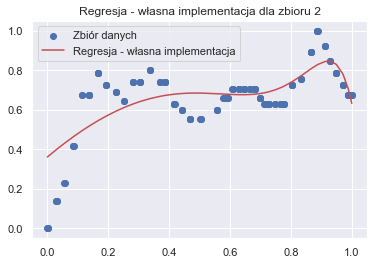

In [60]:
plt.scatter(zbior2['x'], zbior2['y'], color='b', label='Zbiór danych')
plt.plot(zbior2['x'], zbior2_predict16_a, color='r', label='Regresja - własna implementacja')
plt.title('Regresja - własna implementacja dla zbioru 2')
plt.legend()
plt.show()

In [61]:
mse_16_a_2 = regresja2_tich_a.least_squares(regresja2_tich_a.w, zbior2_poly16_bias, np.array(zbior2['y']))
mse_16_sklearn_2 = mean_squared_error(zbior2['y'], zbior2_predict16)
print('MSE dla własnej implementacji regresji liniowej dla wielomianu 16 stopnia wynosi', mse_16_a_2[0][0])
print('MSE dla sklearn wynosi', mse_16_sklearn_2)

MSE dla własnej implementacji regresji liniowej dla wielomianu 16 stopnia wynosi 0.013061356615127622
MSE dla sklearn wynosi 0.013096028257690113


### Regresja liniowa z regularyzacją Tichonowa dla zbioru 3

In [62]:
zbior3_poly16 = poly16.fit_transform(zbior3['x'].values.reshape(-1,1))
regresja3_tich = Ridge(alpha=0.1)
regresja3_tich.fit(zbior3_poly16, zbior3['y'])
zbior3_predict16 = regresja3_tich.predict(zbior3_poly16)

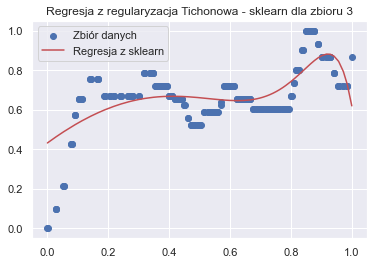

In [63]:
plt.scatter(zbior3['x'], zbior3['y'], color='b', label='Zbiór danych')
plt.plot(zbior3['x'], zbior3_predict16, color='r', label='Regresja z sklearn')
plt.title('Regresja z regularyzacja Tichonowa - sklearn dla zbioru 3')
plt.legend()
plt.show()

In [64]:
regresja3_tich_a = regresja()
regresja3_tich_a.analityczna_Tichonowa(zbior3_poly16, zbior3['y'], lbd=0.1)
zbior3_poly16_bias = np.concatenate([np.ones((len(zbior3_poly16), 1)), zbior3_poly16], axis=1)
zbior3_predict16_a = np.matmul(zbior3_poly16_bias, regresja3_tich_a.w)

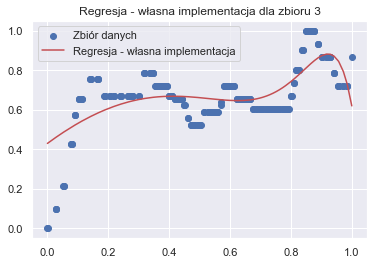

In [65]:
plt.scatter(zbior3['x'], zbior3['y'], color='b', label='Zbiór danych')
plt.plot(zbior3['x'], zbior3_predict16_a, color='r', label='Regresja - własna implementacja')
plt.title('Regresja - własna implementacja dla zbioru 3')
plt.legend()
plt.show()

In [66]:
mse_16_a_3 = regresja3_tich_a.least_squares(regresja3_tich_a.w, zbior3_poly16_bias, np.array(zbior3['y']))
mse_16_sklearn_3 = mean_squared_error(zbior3['y'], zbior3_predict16)
print('MSE dla własnej implementacji regresji liniowej dla wielomianu 16 stopnia wynosi', mse_16_a_3[0][0])
print('MSE dla sklearn wynosi', mse_16_sklearn_3)

MSE dla własnej implementacji regresji liniowej dla wielomianu 16 stopnia wynosi 0.012015819546077848
MSE dla sklearn wynosi 0.012042379834254076


Wyniki dla regresji z regularyzacją Tichonowa z pakietu sklearn oraz wersji własnej nie różnią się o bardzo dużo. Regresja wykonana tymi metodami daje bardzo podobne wartości MSE.